## Step 1: Import the libraries

In [1]:
# import the libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

## Step 2: Import the dataset

In [2]:
# Imports and read in the csv file from a directory using pandas library
bmi_model = pd.read_csv("BMI.csv")
# print the data
bmi_model

,age,height,weight,bmi,class_
0,18,1.70,130.51,45.39,obese
1,71,1.70,69.30,24.04,normal
2,31,1.97,141.19,36.45,obese
3,52,2.07,146.50,34.08,obese
4,45,1.76,69.05,22.18,normal
...,...,...,...,...,...
19995,92,1.67,102.67,36.66,obese
19996,29,1.80,81.63,25.17,overweight
19997,26,1.92,95.30,25.80,overweight
19998,67,1.87,62.96,18.04,underweight


In [3]:
# print the first 5 rows of the data
bmi_model.head(5)

,age,height,weight,bmi,class_
0,18,1.70,130.51,45.39,obese
1,71,1.70,69.30,24.04,normal
2,31,1.97,141.19,36.45,obese
3,52,2.07,146.50,34.08,obese
4,45,1.76,69.05,22.18,normal


## Step 3: Data cleaning and preparation

In [4]:
# detecting missing values
bmi_model.isna().sum()

age       0
height    0
weight    0
bmi       0
class_    0
dtype: int64

In [5]:
bmi_model.duplicated().sum()

0

<Figure size 768x576 with 0 Axes>

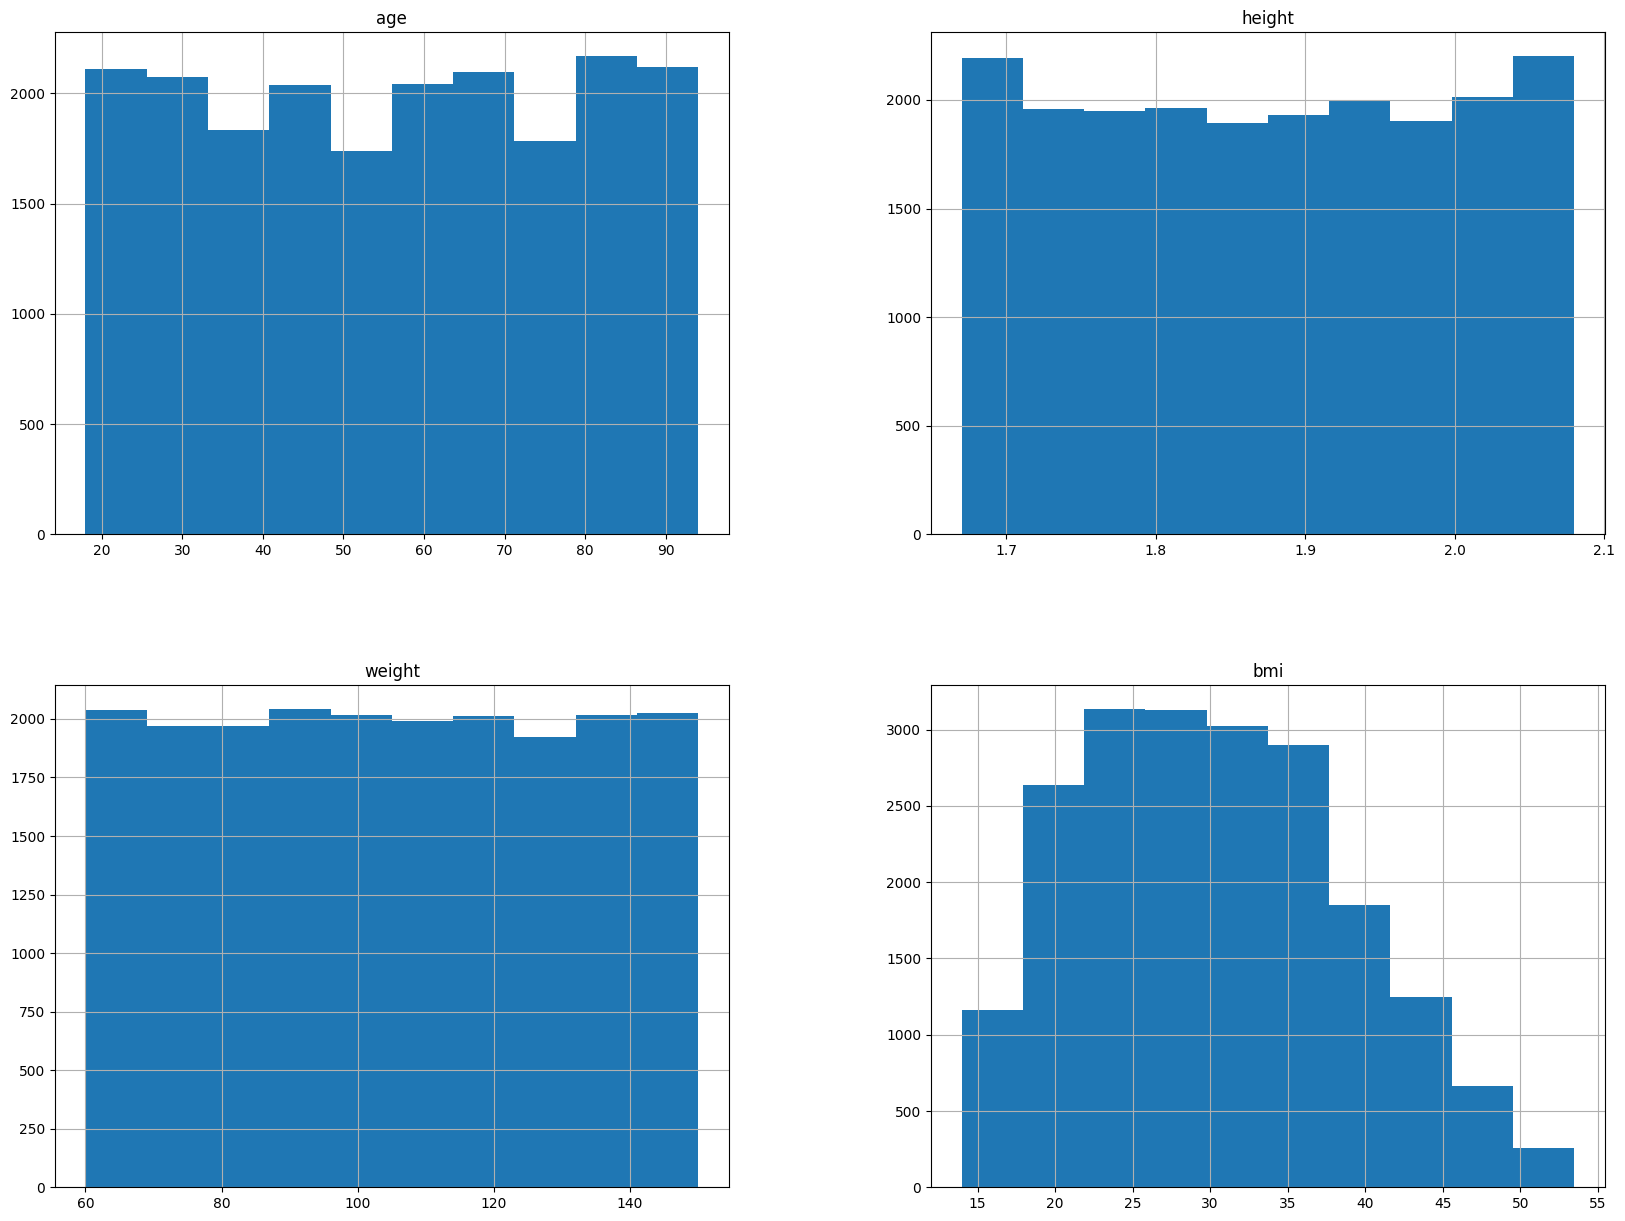

In [6]:
plt.figure(dpi = 120)
bmi_model.hist(figsize = (20, 15)) # These charts display all the numerical datatypes (i
plt.show()

In [7]:
# prints the basic statistics of the dataset
bmi_model.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,20000.0,56.104100,22.399546,18.00,36.00,56.000,76.0000,94.00
height,20000.0,1.875216,0.118743,1.67,1.77,1.880,1.9800,2.08
weight,20000.0,104.987398,25.996878,60.00,82.60,104.855,127.6625,150.00
bmi,20000.0,30.221564,8.479845,13.97,23.39,29.685,36.1700,53.48


In [8]:
# This verifies that there is no null and nan values; and the datatype
bmi_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     20000 non-null  int64  
 1   height  20000 non-null  float64
 2   weight  20000 non-null  float64
 3   bmi     20000 non-null  float64
 4   class_  20000 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 781.4+ KB


In [9]:
# Get all the categorical columns and entries; then assign to a variable bmi_model_obj
bmi_object = bmi_model.select_dtypes(include = "object")

In [10]:
# print all object data type columns
print(bmi_object)

            class_
0            obese
1           normal
2            obese
3            obese
4           normal
...            ...
19995        obese
19996   overweight
19997   overweight
19998  underweight
19999   overweight

[20000 rows x 1 columns]


In [11]:
# print the number of unique entries in the object column (class_)
bmi_object.class_.nunique()

4

In [12]:
bmi_object.class_.unique()

array(['obese', 'normal', 'overweight', 'underweight'], dtype=object)

In [13]:
# Get features (variables) needed for the regression task
bmi_numeric = bmi_model.select_dtypes(exclude = "object") # A variable created to contai
bmi_numeric

,age,height,weight,bmi
0,18,1.70,130.51,45.39
1,71,1.70,69.30,24.04
2,31,1.97,141.19,36.45
3,52,2.07,146.50,34.08
4,45,1.76,69.05,22.18
...,...,...,...,...
19995,92,1.67,102.67,36.66
19996,29,1.80,81.63,25.17
19997,26,1.92,95.30,25.80
19998,67,1.87,62.96,18.04


<Axes: >

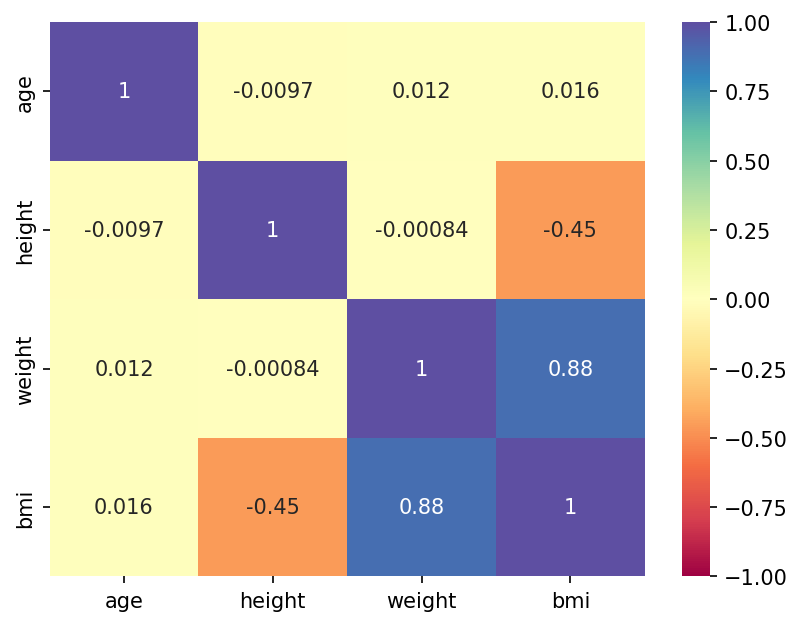

In [14]:
# Exploratory Data Analysis
plt.figure(dpi=150)
sns.heatmap(bmi_numeric.corr(), annot = True, vmin = -1, vmax = 1, cmap = "Spectral") # checking for correlation to see if any o

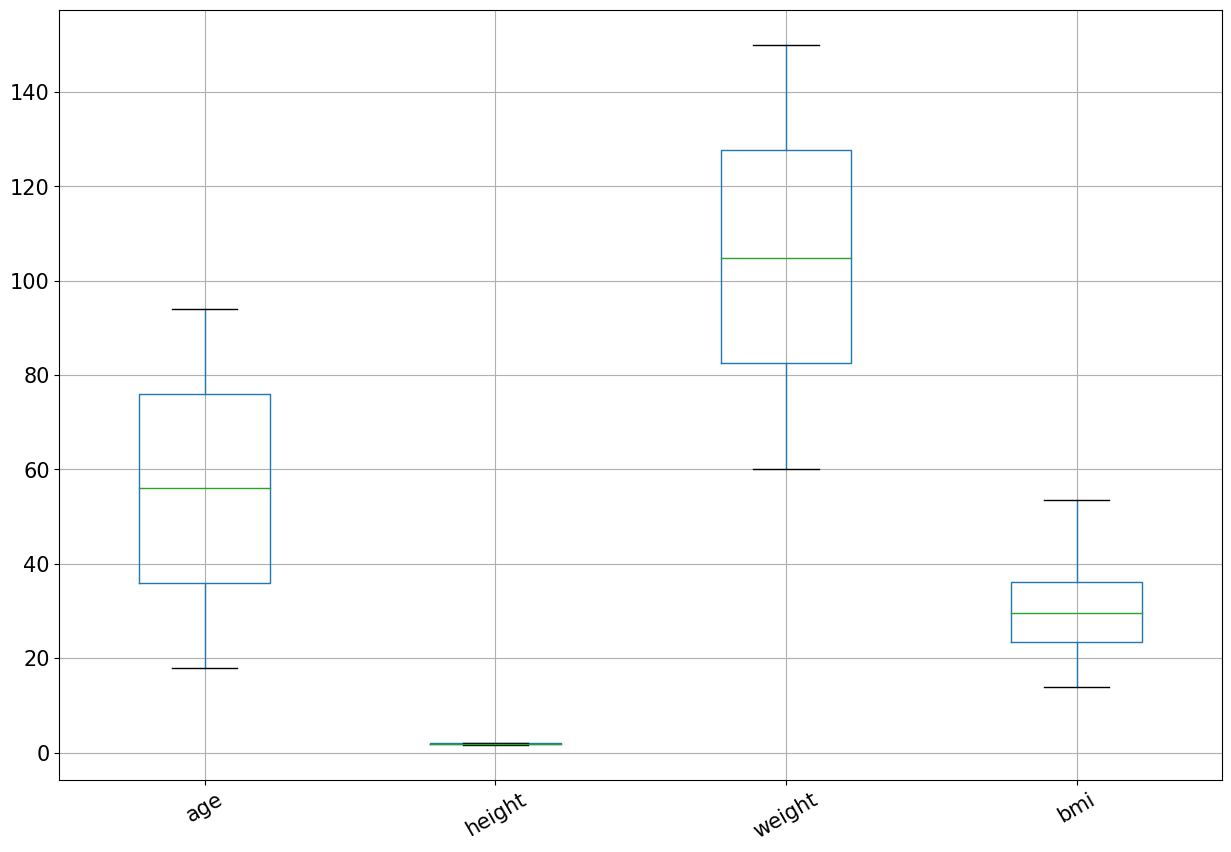

In [15]:
# display a boxplot
bmi_numeric.boxplot(figsize = (15,10), fontsize = 15, rot = 30) # shows the number of nu
plt.show() # plot shows the count of each numerical entry

### The boxplot shows that some of the variables exert dominance over the others hence the need for scaling.

## DEVELOPING THE MACHINE LEARNING MODEL
Simple Linear regression model

In [16]:
from sklearn.model_selection import train_test_split # sci-kit learn library to split tr
from sklearn.preprocessing import StandardScaler # to rescale the numerical data (Anothe

## Step 4: Feature Selection
### Creating the train and test dataset
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for
testing.

In [17]:
# Split data into input and output variables
#X = data[['var1', 'var2']] part of the dataset to be used for prediction (serve as inde
X = bmi_numeric.drop(['bmi'], axis=1)
# value to be predicted (output of the prediction)
y = bmi_numeric['bmi']

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train # the independent variables used for training to predict BMI (size is now 16000

,age,height,weight
5894,40,1.91,134.29
3728,91,2.03,119.60
8958,31,1.96,126.92
7671,94,1.85,146.88
5999,69,1.80,95.03
...,...,...,...
11284,45,1.85,122.08
11964,75,1.71,79.08
5390,64,2.00,65.92
860,72,1.67,61.03


In [20]:
y_train

5894     36.73
3728     29.03
8958     33.20
7671     43.01
5999     29.27
         ...  
11284    35.68
11964    27.02
5390     16.50
860      21.80
15795    33.06
Name: bmi, Length: 16000, dtype: float64

In [21]:
#scaling the dataset
#To use regularization, you can apply StandardScaler to ensure that all features have ze
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [22]:
#converting to pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

## Simple Linear Regression Model
This is developed to predict a continuous target variable (BMI). 
The numerical variables are compared to the target variable one at a time. 
It works by fitting a linear model to a dataset by finding a line of best fit that
minimizes the sum of squared errors.

### Reshaping
sklearn accepts data in matrix form i.e. row and column. Hence, when the data is a single feature, we need
to reshape the data to have row and column. Note: the target does not need to be reshaped.
In order to reshape a series, we first need to convert to numpy arrary using series.to_numpy() and apply the
.reshape(-1,1) funtion, where -1 is a place holder for all the rows and 1 represents the column.

In [23]:
X_train_scaled['height'].shape # sklearn accepts data in rows and columns

(16000,)

In [24]:
X_test_scaled['height'].shape # sklearn accepts data in rows and columns

(4000,)

In [25]:
# Reshaping the attribute
X_train_scaled_height = X_train_scaled['height'].to_numpy().reshape(-1,1)
X_test_scaled_height = X_test_scaled['height'].to_numpy().reshape(-1,1)

### Step 5: Model Selection

In [26]:
from sklearn.linear_model import LinearRegression # importing the linear regression libr
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # importing 

In [27]:
bmi_height = LinearRegression() # fitting the model to a dataset using the LinearRegressor

In [28]:
# Train the model using the training sets
bmi_height.fit(X_train_scaled_height,y_train)

LinearRegression()

In [29]:
# Print coefficients
intercept = bmi_height.intercept_
coefficient = bmi_height.coef_
print('Intercept:', intercept)
print('Coefficients:', coefficient)

Intercept: 30.227062499999995
Coefficients: [-3.81179598]


### Checking the formula for calculating BMI
The formula for simple linear regression is Y = mX + b, where Y is the response (dependent) variable, X is the predictor (independent) variable, m is the estimated slope, and b is the estimated intercept.
- The dependent variable (Y) in this case is BMI, the slope (m) is -3.81, the predictor (X) is height and the intercept (b) is 30.23

In [30]:
# Showing the formula for calculating bmi [bmi = intercept + coefficient * height]
linear_model = 'bmi = {:.2f} + {:.2f}*height'.format(intercept, coefficient[0])
print('Linear Regression Model:', linear_model)

Linear Regression Model: bmi = 30.23 + -3.81*height


In [31]:
# Make predictions with the testing dataset
bmi_pred = bmi_height.predict(X_test_scaled_height)

## Step 6: Model Evaluation
Compute the evaluation metrics for measuring the performance of the regression model
(RMSE, MAE, Coefficient of determination, MSE)

In [32]:
# The mean absolute error
mean_abs = mean_absolute_error(y_test,bmi_pred)
# The mean squared error
mean_squared = mean_squared_error(y_test,bmi_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
print(f"The result of the coefficient of determination is: {r2_score(y_test,bmi_pred):.2f}")

The result of the mean absolute error is: 6.44
The result of the mean squared error is : 56.57
The result of the root mean squared error is : 7.52
The result of the coefficient of determination is: 0.22


The evaluation metrics you provided are commonly used to assess the performance of regression models. Here is the interpretation of each metric:

Mean Absolute Error (MAE): This is the average of the absolute differences between the predicted values and the actual values. In this case, the MAE of 6.44 indicates that, on average, the model's predictions are off by 6.44 units from the actual values.

Mean Squared Error (MSE): This is the average of the squared differences between the predicted values and the actual values. The MSE of 56.57 indicates that the model's predictions are off by a larger magnitude than the MAE. This is because the MSE gives more weight to larger errors due to the squaring operation.

Root Mean Squared Error (RMSE): This is the square root of the MSE, which gives the metric in the same units as the target variable. The RMSE of 7.52 means that, on average, the model's predictions are off by 7.52 units from the actual values.

Coefficient of Determination (R^2): This is a measure of how well the model fits the data. The R^2 value of 0.22 indicates that the model is able to capture some of the information from the input features to make predictions, but there is still a lot of unexplained variation in the target variable. In other words, the model is explaining only 22% of the variance in the target variable.

Overall, the model's performance is moderate, but it still needs to be improved to make more accurate predictions. It is important to note that the interpretation of these metrics may vary depending on the context and the specific problem being addressed.

## Linear Regression for Age feature

### Reshaping

In [33]:
X_train_scaled['age'].shape # sklearn accepts data in rows and columns

(16000,)

In [34]:
X_test_scaled['age'].shape # sklearn accepts data in rows and columns

(4000,)

In [35]:
# Reshaping the attribute
X_train_scaled_age = X_train_scaled['age'].to_numpy().reshape(-1,1)
X_test_scaled_age = X_test_scaled['age'].to_numpy().reshape(-1,1)

### Model Selection

In [36]:
bmi_age = LinearRegression() # fitting the model to a dataset using the LinearRegressor

In [37]:
# Train the model using the training sets
bmi_age.fit(X_train_scaled_age,y_train)

LinearRegression()

In [38]:
# Print coefficients
intercept = bmi_age.intercept_
coefficient = bmi_age.coef_
print('Intercept:', intercept)
print('Coefficients:', coefficient)

Intercept: 30.2270625
Coefficients: [0.10413303]


In [39]:
# Make predictions with the testing dataset
bmi_age_pred = bmi_age.predict(X_test_scaled_age)

### Model Evaluation

In [40]:
# The mean absolute error
mean_abs = mean_absolute_error(y_test,bmi_age_pred)
# The mean squared error
mean_squared = mean_squared_error(y_test,bmi_age_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
print(f"The result of the coefficient of determination is: {r2_score(y_test,bmi_age_pred):.2f}")

The result of the mean absolute error is: 7.07
The result of the mean squared error is : 72.58
The result of the root mean squared error is : 8.52
The result of the coefficient of determination is: 0.00


The evaluation metrics you provided are commonly used to assess the performance of regression models. Here is the interpretation of each metric:

Mean Absolute Error (MAE): This is the average of the absolute differences between the predicted values and the actual values. In this case, the MAE of 7.07 indicates that, on average, the model's predictions are off by 7.07 units from the actual values.

Mean Squared Error (MSE): This is the average of the squared differences between the predicted values and the actual values. The MSE of 72.58 indicates that the model's predictions are off by a larger magnitude than the MAE. This is because the MSE gives more weight to larger errors due to the squaring operation.

Root Mean Squared Error (RMSE): This is the square root of the MSE, which gives the metric in the same units as the target variable. The RMSE of 8.52 means that, on average, the model's predictions are off by 8.52 units from the actual values.

Coefficient of Determination (R^2): This is a measure of how well the model fits the data. The R^2 value of 0.00 means that the model is performing very poorly and is not capturing any information from the input features to make accurate predictions. In other words, the model is unable to explain the variation in the target variable.

Overall, the model's performance is not good and needs to be improved significantly. It is important to note that the interpretation of these metrics may vary depending on the context and the specific problem being addressed.

## Linear Regression for Age feature

### Reshaping

In [41]:
# Reshaping the attribute
X_train_scaled_weight = X_train_scaled['weight'].to_numpy().reshape(-1,1)
X_test_scaled_weight = X_test_scaled['weight'].to_numpy().reshape(-1,1)

### Model Selection

In [42]:
bmi_weight = LinearRegression() # fitting the model to a dataset using the LinearRegressor

In [43]:
# Train the model using the training sets
bmi_weight.fit(X_train_scaled_weight,y_train)

LinearRegression()

In [44]:
# Print coefficients
intercept = bmi_weight.intercept_
coefficient = bmi_weight.coef_
print('Intercept:', intercept)
print('Coefficients:', coefficient)

Intercept: 30.227062500000002
Coefficients: [7.48355028]


In [45]:
# Make predictions with the testing dataset
bmi_weight_pred = bmi_weight.predict(X_test_scaled_age)

### Model Evaluation

In [46]:
# The mean absolute error
mean_abs = mean_absolute_error(y_test,bmi_weight_pred)
# The mean squared error
mean_squared = mean_squared_error(y_test,bmi_weight_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
print(f"The result of the coefficient of determination is: {r2_score(y_test,bmi_weight_pred):.2f}")

The result of the mean absolute error is: 9.03
The result of the mean squared error is : 124.24
The result of the root mean squared error is : 11.15
The result of the coefficient of determination is: -0.71


The evaluation metrics you provided are commonly used to assess the performance of regression models. Here is the interpretation of each metric:

Mean Absolute Error (MAE): This is the average of the absolute differences between the predicted values and the actual values. In this case, the MAE of 9.03 indicates that, on average, the model's predictions are off by 9.03 units from the actual values.

Mean Squared Error (MSE): This is the average of the squared differences between the predicted values and the actual values. The MSE of 124.24 indicates that the model's predictions are off by a larger magnitude than the MAE. This is because the MSE gives more weight to larger errors due to the squaring operation.

Root Mean Squared Error (RMSE): This is the square root of the MSE, which gives the metric in the same units as the target variable. The RMSE of 11.15 means that, on average, the model's predictions are off by 11.15 units from the actual values.

Coefficient of Determination (R^2): This is a measure of how well the model fits the data. The R^2 value of -0.71 means that the model is performing poorly and is providing negative predictive value. This indicates that the model is not fitting the data well and may be making random or incorrect predictions.

Overall, the model's performance is not good and needs to be improved. It is important to note that the interpretation of these metrics may vary depending on the context and the specific problem being addressed.

## MULTIPLE LINEAR REGRESSION MODEL

In [47]:
mlr_bmi = LinearRegression()

In [48]:
# introduce the multiple independent variables and train
mlr_bmi.fit(X_train_scaled,y_train)

LinearRegression()

In [49]:
# test the model
bmi_preds = mlr_bmi.predict(X_test_scaled)

In [50]:
# evaluate the performance of the model
mean_abs = mean_absolute_error(y_test,bmi_preds)
mean_squared = mean_squared_error(y_test,bmi_preds)

print(f"The mean_absolute_error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The root mean squared error is : {np.sqrt(mean_squared):.2f}")
# The coefficient of determination: 1 is perfect prediction
print(f"The coefficient of determination is: {r2_score(y_test,bmi_preds):.2f}")

The mean_absolute_error is: 0.80
The result of the mean squared error is : 1.07
The root mean squared error is : 1.04
The coefficient of determination is: 0.99


In [51]:
# print the linear model
coefficients = mlr_bmi.coef_
intercept = mlr_bmi.intercept_
linear_model = 'y = {:.2f} + {:.2f}*age + {:.2f}*height + {:.2f}*weight'.format(intercept, coefficients[0], coefficients[1], coefficients[2])
print('Multiple Linear Regression Model:', linear_model)

Multiple Linear Regression Model: y = 30.23 + 0.00*age + -3.83*height + 7.49*weight


# CLASSIFICATION

### STEP 1: completed from above

### STEP 2: completed from above

### STEP 3: EXPLORATORY DATA ANALYSIS

#### Balance the dataset
Balancing your dataset is an important consideration while building a machine learning model. This is
because machine learning learning models learn more with the availability of many examples. There are
several methods, however, here we are using Synthetic Minority Over-sampling Technique. Note: balancing
is done based on the target variable

## Plot of the target (class_) for the BMI dataset to see the distribution of values
As can be seen from the plot, all of them have largely different values. This shows that the dataset is not
balanced.

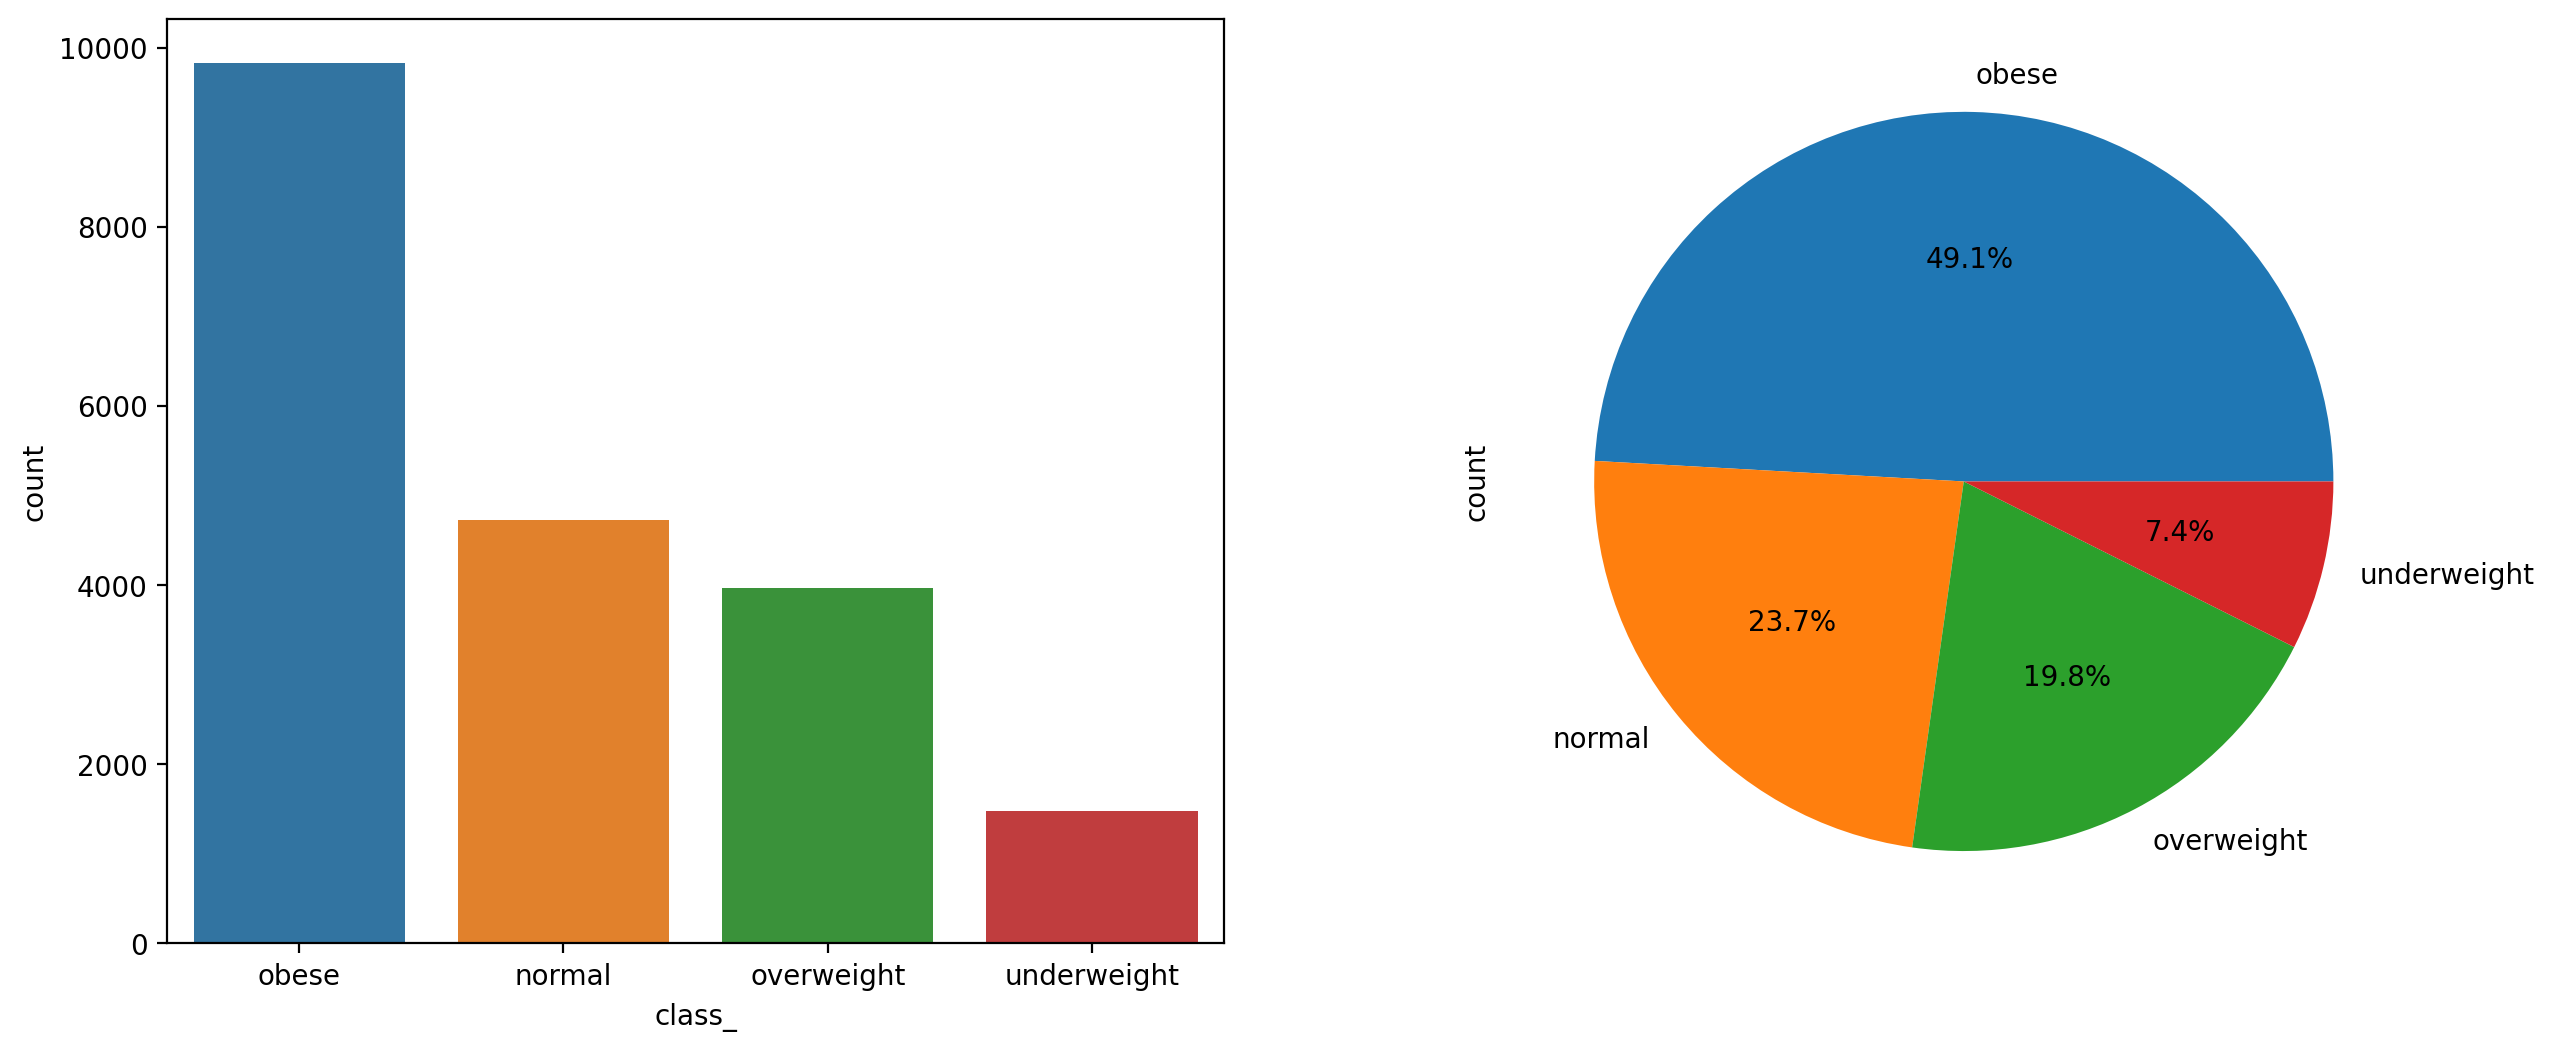

In [52]:
# seaborn plotting of the target variable (class_) of the BMI dataset
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for th
a = sns.countplot(x = 'class_', data = bmi_model, ax=ax_position[0]) #ax_position[0] spe
a = bmi_model['class_'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #a

In [53]:
from sklearn.model_selection import train_test_split # train_test_split is needed to spl
from sklearn.preprocessing import MinMaxScaler # for normalisation or standardisation o

### STEP 4: Feature selection

In [54]:
X = bmi_model.drop('class_', axis = 1)
y = bmi_model['class_']

#### APPLYING SMOTE
Since our target class label data is not equally distributed, Synthetic Minority Oversampling Technique
(SMOTE) will assist us to balance it.

In [55]:
# import SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created

In [56]:
# apply SMOTE to resample the dataset
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

#### PLOT THE BALANCED DATASET

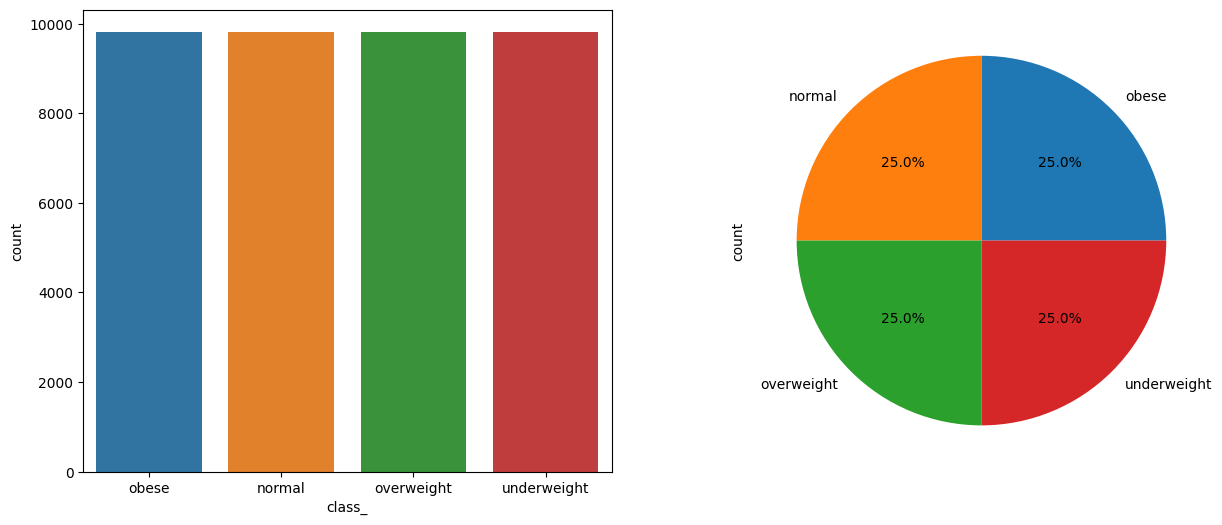

In [57]:
# Plot of the dataset
bal_bmi = pd.concat([X_res,y_res], axis = 1) # creating a dataframe for the balanced dat
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='class_',data=bal_bmi, ax=ax[0]) # assigning each of the plot to th
a= bal_bmi['class_'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning ea

#### Splitting the dataset

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling the dataset

In [59]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Importing the evaluation metrics

In [60]:
#from sklearn.metrics import plot_roc_curve

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

### STEP 5: Model Selection

### Baseline models
A baseline model is a simple model that acts as a reference in a machine learning project.

#### Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
bmi_classifier = LogisticRegression()

In [64]:
bmi_classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [65]:
bmi_pred = bmi_classifier.predict(X_test_scaled)

In [66]:
print(classification_report(y_test,bmi_pred))

              precision    recall  f1-score   support

      normal       1.00      0.95      0.97      1997
       obese       1.00      0.95      0.98      1895
  overweight       0.95      1.00      0.97      1957
 underweight       0.96      1.00      0.98      2010

    accuracy                           0.98      7859
   macro avg       0.98      0.98      0.98      7859
weighted avg       0.98      0.98      0.98      7859



In [67]:
print(confusion_matrix(y_test, bmi_pred))

[[1897    0   14   86]
 [   3 1804   88    0]
 [   0    0 1957    0]
 [   0    0    0 2010]]


### EXAMPLE CLASSIFIER TWO: KNeighborsClassifier

#### kNEIGHBORSCLASSIFIER

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
bmi_classifier = KNeighborsClassifier()

In [70]:
bmi_classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [71]:
bmi_pred = bmi_classifier.predict(X_test_scaled)

### STEP 6: Model Evaluation

In [72]:
print(classification_report(y_test,bmi_pred))

              precision    recall  f1-score   support

      normal       0.99      0.98      0.98      1997
       obese       1.00      0.97      0.98      1895
  overweight       0.97      0.99      0.98      1957
 underweight       0.99      1.00      0.99      2010

    accuracy                           0.98      7859
   macro avg       0.98      0.98      0.98      7859
weighted avg       0.98      0.98      0.98      7859



In [73]:
print(confusion_matrix(y_test, bmi_pred))

[[1957    0   16   24]
 [   5 1837   53    0]
 [   7    7 1943    0]
 [   8    0    0 2002]]


### naive_bayes

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
bmi_classifier = GaussianNB()

In [76]:
bmi_classifier.fit(X_train_scaled,y_train)

GaussianNB()

In [77]:
bmi_pred = bmi_classifier.predict(X_test_scaled)

In [78]:
print(classification_report(y_test,bmi_pred))

              precision    recall  f1-score   support

      normal       0.97      0.92      0.95      1997
       obese       0.99      0.94      0.97      1895
  overweight       0.92      0.97      0.94      1957
 underweight       0.96      1.00      0.98      2010

    accuracy                           0.96      7859
   macro avg       0.96      0.96      0.96      7859
weighted avg       0.96      0.96      0.96      7859



### Support Vector Machine

In [79]:
from sklearn.svm import SVC

In [80]:
bmi_classifier = SVC()

In [81]:
bmi_classifier.fit(X_train_scaled,y_train)

SVC()

In [82]:
bmi_pred = bmi_classifier.predict(X_test_scaled)

In [83]:
print(classification_report(y_test,bmi_pred))

              precision    recall  f1-score   support

      normal       1.00      0.98      0.99      1997
       obese       1.00      0.97      0.99      1895
  overweight       0.97      1.00      0.99      1957
 underweight       0.98      1.00      0.99      2010

    accuracy                           0.99      7859
   macro avg       0.99      0.99      0.99      7859
weighted avg       0.99      0.99      0.99      7859



## Hyperparameter tuning using GridSearchCV

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
log_reg = LogisticRegression()

In [86]:
grid_param = {
 'penalty' : ['l1','l2'],
 'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [87]:
gscv = GridSearchCV(log_reg, # model
 param_grid = grid_param, # hyperparameters
 scoring='accuracy', # metric for scoring
 cv=5) # number of folds

In [88]:
gscv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [89]:
print("Tuned Hyperparameters :", gscv.best_params_)
print("Accuracy :",gscv.best_score_)

Tuned Hyperparameters : {'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9780801922425161


In [90]:
log_reg = LogisticRegression(C = 0.1,
 penalty = 'l1',
 solver = 'liblinear')
log_reg.fit(X_train_scaled,y_train)
y_pred = log_reg.predict(X_test_scaled)
print("Accuracy:",log_reg.score(X_test_scaled, y_test))

Accuracy: 0.9563557704542562


The GridSearchCV did not improve our model. What if the number of folds is changed to 10. Will
there be any improvement in terms of accuracy?

## Increasing the number of folds to 10

In [91]:
log_reg = LogisticRegression()

In [92]:
grid_param = {
 'penalty' : ['l1','l2'],
 'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [93]:
gscv = GridSearchCV(log_reg, # model
 param_grid = grid_param, # hyperparameters
 scoring='accuracy', # metric for scoring
 cv=10) # number of folds

In [94]:
gscv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [95]:
print("Tuned Hyperparameters :", gscv.best_params_)
print("Accuracy :",gscv.best_score_)

Tuned Hyperparameters : {'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.978620924644531


In [96]:
log_reg = LogisticRegression(C = 0.1,
 penalty = 'l1',
 solver = 'liblinear')
log_reg.fit(X_train_scaled,y_train)
y_pred = log_reg.predict(X_test_scaled)
print("Accuracy:",log_reg.score(X_test_scaled, y_test))

Accuracy: 0.9563557704542562


The GridSearchCV did not improve our model when the number of folds was changed to 10.